In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [3]:
df = pd.read_csv('games.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing(df)

,Total,Percent
Critic_Score,8578,51.319174
Rating,6766,40.478612
User_Score,6701,40.089740
Year_of_Release,269,1.609333
Name,2,0.011965
Genre,2,0.011965
Platform,0,0.000000
NA_sales,0,0.000000
EU_sales,0,0.000000
JP_sales,0,0.000000


In [7]:
num_cols =[]
for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0:
        num_cols.append(col)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}.'.format(col, dt, temp_null_count))

Колонка Name. Тип данных object. Количество пустых значений 2.
Колонка Year_of_Release. Тип данных float64. Количество пустых значений 269.
Колонка Genre. Тип данных object. Количество пустых значений 2.
Колонка Critic_Score. Тип данных float64. Количество пустых значений 8578.
Колонка User_Score. Тип данных object. Количество пустых значений 6701.
Колонка Rating. Тип данных object. Количество пустых значений 6766.


In [8]:
df_num = df[num_cols]
df_num

,Name,Year_of_Release,Genre,Critic_Score,User_Score,Rating
0,Wii Sports,2006.0,Sports,76.0,8,E
1,Super Mario Bros.,1985.0,Platform,NaN,NaN,NaN
2,Mario Kart Wii,2008.0,Racing,82.0,8.3,E
3,Wii Sports Resort,2009.0,Sports,80.0,8,E
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,NaN,NaN,NaN
...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,2016.0,Action,NaN,NaN,NaN
16711,LMA Manager 2007,2006.0,Sports,NaN,NaN,NaN
16712,Haitaka no Psychedelica,2016.0,Adventure,NaN,NaN,NaN
16713,Spirits & Spells,2003.0,Platform,NaN,NaN,NaN


### Удалим строки, которые содержат пустые значения

In [9]:
data = df.dropna(axis=0, how='any')
(df.shape, data.shape)

data.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
NA_sales           0
EU_sales           0
JP_sales           0
Other_sales        0
Critic_Score       0
User_Score         0
Rating             0
dtype: int64

### Преобразование категориальных признаков в числовые

In [11]:
cat_temp_df = df[['Genre']]
cat_temp_df.head()

imp2 = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
df_imp2 = imp2.fit_transform(cat_temp_df)
df_imp2

cat_enc = pd.DataFrame({'c1':df_imp2.T[0]})
cat_enc

,c1
0,Sports
1,Platform
2,Racing
3,Sports
4,Role-Playing
...,...
16710,Action
16711,Sports
16712,Adventure
16713,Platform


### Кодирование категорий наборами бинарных значений

In [13]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

(16715, 1)

In [14]:
cat_enc_ohe.shape

(16715, 12)

In [15]:
cat_enc_ohe

<16715x12 sparse matrix of type '<class 'numpy.float64'>'
	with 16715 stored elements in Compressed Sparse Row format>

In [16]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [17]:
cat_enc.head(10)

,c1
0,Sports
1,Platform
2,Racing
3,Sports
4,Role-Playing
5,Puzzle
6,Platform
7,Misc
8,Platform
9,Shooter


### Масштабирование данных

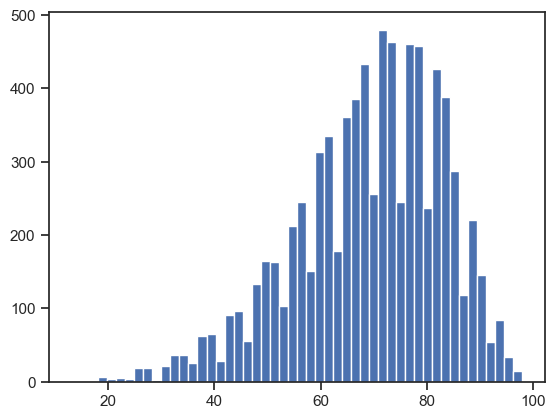

In [20]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[['Critic_Score']])

plt.hist(df['Critic_Score'], 50)
plt.show()

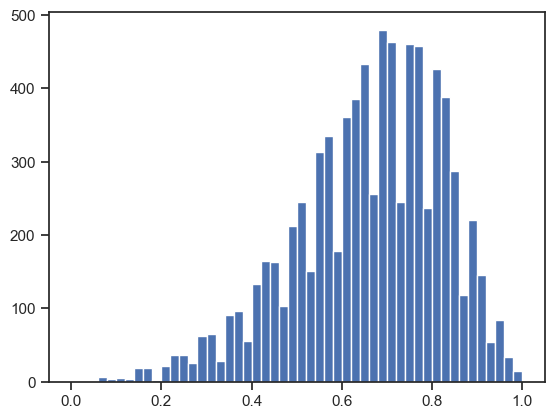

In [21]:
plt.hist(sc1_data, 50)
plt.show()